<a href="https://colab.research.google.com/github/Praneeth-9904/ML-Labs-colab/blob/main/LAB7_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

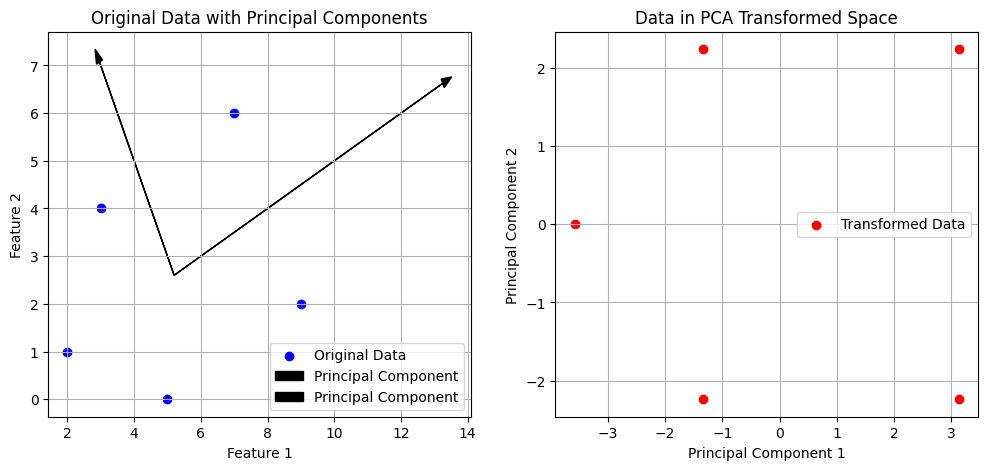

In [5]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)])

mean = np.mean(data, axis=0)
data_centered = data - mean

cov_matrix = np.cov(data_centered, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

principal_component_1 = eigenvectors[:, 0]
principal_component_2 = eigenvectors[:, 1]

transformed_data = data_centered.dot(eigenvectors)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(data[:, 0], data[:, 1], color='b', label="Original Data")
for length, vector in zip(eigenvalues, eigenvectors.T):
    axs[0].arrow(mean[0], mean[1], length * vector[0], length * vector[1],
                 head_width=0.2, head_length=0.3, color='black', label="Principal Component")
axs[0].set_title("Original Data with Principal Components")
axs[0].set_xlabel("Feature 1")
axs[0].set_ylabel("Feature 2")
axs[0].grid(True)
axs[0].legend()

axs[1].scatter(transformed_data[:, 0], transformed_data[:, 1], color='r', label="Transformed Data")
axs[1].set_title("Data in PCA Transformed Space")
axs[1].set_xlabel("Principal Component 1")
axs[1].set_ylabel("Principal Component 2")
axs[1].grid(True)
axs[1].legend()

plt.show()

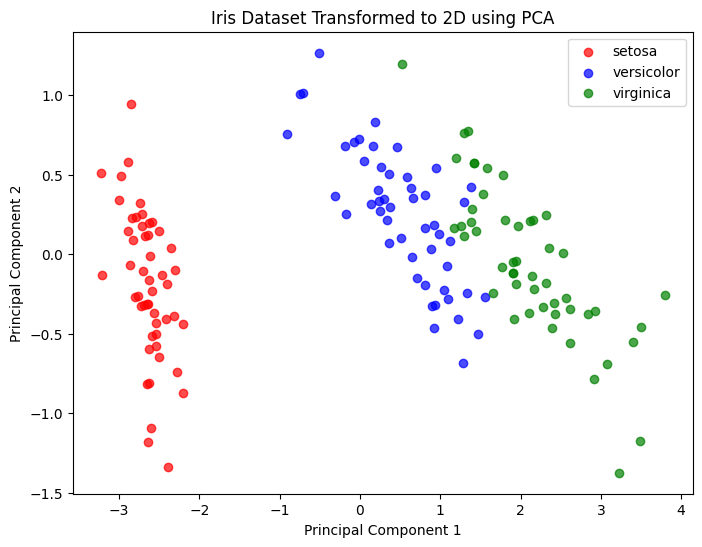

In [6]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
data = iris.data
labels = iris.target
target_names = iris.target_names

data_mean = np.mean(data, axis=0)
centered_data = data - data_mean

cov_matrix = np.cov(centered_data, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

top_eigenvectors = sorted_eigenvectors[:, :2]

transformed_data = centered_data @ top_eigenvectors

plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']

for i, target_name in enumerate(target_names):
    plt.scatter(
        transformed_data[labels == i, 0], transformed_data[labels == i, 1],
        alpha=0.7, color=colors[i], label=target_name
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Iris Dataset Transformed to 2D using PCA')
plt.legend()
plt.show()
